In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
NORM = "ortho"

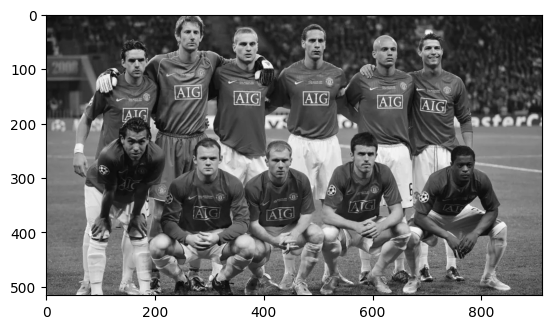

In [101]:
image = cv2.imread('manchester.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = 'gray')
plt.show()

In [102]:
def add_gaussian_noise(image, sigma=50):
    noise = np.random.normal(0, sigma, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image

In [103]:
def windowed_fourier_transform(image, window_size):
    rows, cols = image.shape
    mean_spectra = []

    for i in range(0, rows, window_size):
        for j in range(0, cols, window_size):
            window = image[i: i + window_size, j : j + window_size]
            F = np.fft.fft2(window, norm=NORM)
            mean_spectra.append(np.abs(F).flatten())
    return np.percentile(np.concatenate(mean_spectra, axis=0), 98)

In [104]:
def filter_spectrum(image, threshold):
    F = np.fft.fft2(image, norm=NORM)

    F_shifted = np.fft.fftshift(F)

    magnitude = np.abs(F_shifted)
    F_shifted[magnitude < threshold] = 0

    return F_shifted

In [105]:
def inverse_fourier_transform(F_shifted):
    F_ishifted = np.fft.ifftshift(F_shifted)
    image_filtered = np.fft.ifft2(F_ishifted, norm=NORM_)
    image_filtered = np.abs(image_filtered)
    return image_filtered

31256.341143357575
15262.192185285907


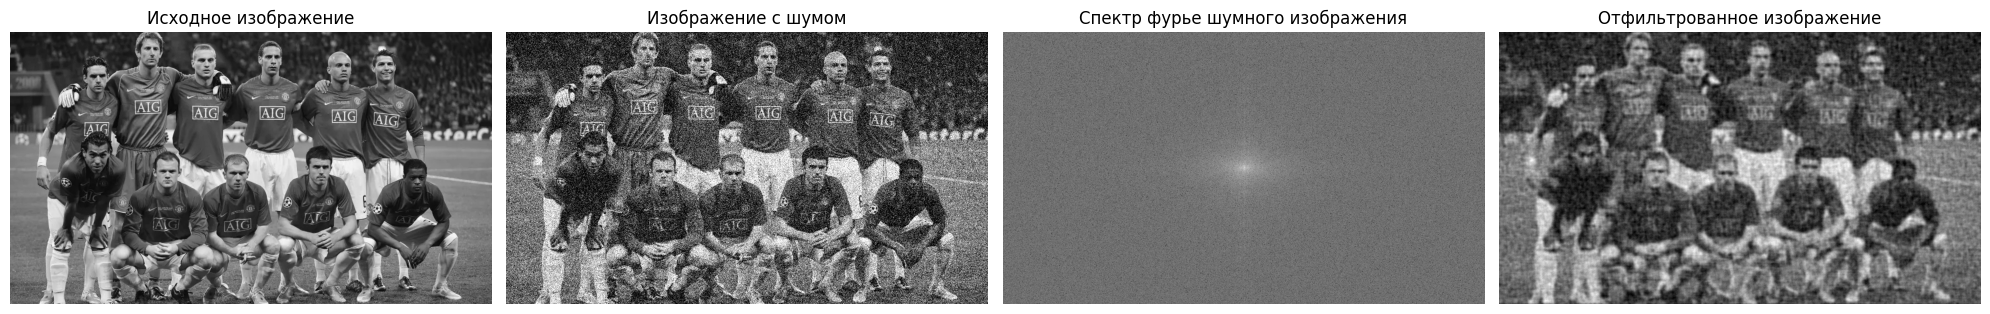

In [106]:
image = image.astype(np.float32)

noisy_img = add_gaussian_noise(image, sigma=50)
print(np.linalg.norm(image - noisy_img))

window_size = 16
mean_spectrum_value = windowed_fourier_transform(noisy_img, window_size)

filtered_spectrum = filter_spectrum(noisy_img, mean_spectrum_value)

filtered_img = inverse_fourier_transform(filtered_spectrum)

print(np.linalg.norm(image - filtered_img))

plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Изображение с шумом')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(np.log1p(np.abs(np.fft.fftshift(np.fft.fft2(noisy_img)))), cmap='gray')
plt.title('Спектр фурье шумного изображения')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(filtered_img, cmap='gray')
plt.title('Отфильтрованное изображение')
plt.axis('off')

plt.tight_layout()
plt.show()